# UNICEF MICS Survey data analysis

Understanding features that can predict why a caretaker might have a vaccination card using classification algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import  StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import classification_report

Data collected at the children's level (MICS Under Five Children's questionnaire modules: Under-five child information panel, Child's age, Birth registration, Early childhood development, Breastfeeding , Care of illness, Immunization, Under-five child selected for blood test.)

Dataset produced by UNICEF and Central Statistics Organization

In [2]:
#importing ch.csv which was converted from .sav format in R. Check get_Congo_to_csv.R file
#Set low_memory = False to avoid the warning about column numbers having mixed type values.
## 100,104,106,114,115,116,117,118,120,122,123,125,126,127,131,133,134,136,152,153,168

ch_df = pd.read_csv('ch_pak.csv',low_memory=False)

In [3]:
ch_df.describe()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,CAGED,chweight,melevel,division,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
count,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,...,16605.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,7932.000000,7932.000000,11679.000000,11679.000000
mean,428.431964,10.352275,7.726198,428.431964,10.352275,7.726198,4.172134,46.795008,15.810747,4.124199,...,1006.465522,0.916998,1.843329,2.785785,-0.146187,2.204219,-0.147429,1.800933,0.004140,2.456375
std,269.415361,5.741518,4.224276,269.415361,5.741518,4.224276,3.794440,29.048289,8.558811,1.372228,...,1108.143834,0.847431,1.406195,1.308579,0.896322,1.371325,0.930452,1.501089,0.912139,1.595279
min,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,-1.777233,0.000000,-3.030231,0.000000,-1.493800,0.000000
25%,192.000000,5.000000,5.000000,192.000000,5.000000,5.000000,2.000000,20.000000,8.000000,3.000000,...,436.000000,0.414079,1.000000,2.000000,-0.931318,1.000000,-0.547089,1.000000,-0.684929,1.000000
50%,399.000000,10.000000,7.000000,399.000000,10.000000,7.000000,2.000000,44.000000,16.000000,4.000000,...,922.000000,0.688373,1.000000,3.000000,-0.168406,2.000000,0.000000,1.000000,-0.029224,2.000000
75%,653.000000,15.000000,9.000000,653.000000,15.000000,9.000000,5.000000,73.000000,23.000000,5.000000,...,1373.000000,1.125123,2.000000,4.000000,0.543420,3.000000,0.495220,3.000000,0.439809,4.000000
max,975.000000,20.000000,42.000000,975.000000,20.000000,42.000000,41.000000,99.000000,31.000000,8.000000,...,9999.000000,8.381366,9.000000,5.000000,2.438155,5.000000,1.781103,5.000000,4.279130,5.000000


In [4]:
columnNumbers = [x for x in range(ch_df.shape[1])]  # list of columns' integer indices

#columnNumbers.remove(0) #removing column integer index 0
ch_df = ch_df.iloc[:, columnNumbers] #return all columns except 0th column
ch_df.head()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,CAGED,chweight,melevel,division,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
0,1,2,7,1,2,7,2,16,21,4,...,1133.0,0.613236,1,1,-1.537632,1,-2.735402,1.0,NaN,NaN
1,1,3,9,1,3,9,2,16,21,4,...,1464.0,0.613236,1,1,-0.643725,2,-1.635452,1.0,NaN,NaN
2,1,4,4,1,4,4,2,17,21,4,...,1376.0,0.613236,1,1,-0.992865,1,-2.065068,1.0,NaN,NaN
3,1,4,5,1,4,5,2,17,21,4,...,310.0,0.613236,1,1,-0.992865,1,-2.065068,1.0,NaN,NaN
4,1,4,6,1,4,6,2,17,21,4,...,310.0,0.613236,1,1,-0.992865,1,-2.065068,1.0,NaN,NaN


In [5]:
wm_df = pd.read_csv('wm_pak.csv', low_memory = False)

In [6]:
columnNumbers = [x for x in range(wm_df.shape[1])]  # list of columns' integer indices

#columnNumbers.remove(0) #removing column integer index 0
wm_df = wm_df.iloc[:, columnNumbers] #return all columns except 0th column
wm_df.head()

,HH1,HH2,LN,WM1,WM2,WM4,WM5,WM6D,WM6M,WM6Y,...,CDEAD,wmweight,welevel,division,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
0,1,1,7,1,1,7,17,21,4,2014,...,0.0,0.558521,1.0,1,0.330435,3,-0.436749,1.0,NaN,NaN
1,1,1,8,1,1,8,17,21,4,2014,...,0.0,0.558521,1.0,1,0.330435,3,-0.436749,1.0,NaN,NaN
2,1,1,9,1,1,9,17,21,4,2014,...,0.0,0.558521,1.0,1,0.330435,3,-0.436749,1.0,NaN,NaN
3,1,2,2,1,2,2,16,21,4,2014,...,0.0,0.558521,1.0,1,-1.537632,1,-2.735402,1.0,NaN,NaN
4,1,3,2,1,3,2,16,21,4,2014,...,4.0,0.558521,1.0,1,-0.643725,2,-1.635452,1.0,NaN,NaN


In [7]:
ch_wm_df = ch_df.merge(wm_df, on = ['HH1','HH2'],suffixes = ('', '_y'))

In [8]:
ch_wm_df = ch_wm_df[ch_wm_df.columns.drop(list(ch_wm_df.filter(regex='_y')))]

In [9]:
ch_wm_df.head()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,WDOM,WAGEM,WDOBFC,WDOBLC,MSTATUS,CEB,CSURV,CDEAD,wmweight,welevel
0,1,2,7,1,2,7,2,16,21,4,...,1233.0,18.0,1286.0,1335.0,1.0,3.0,3.0,0.0,0.558521,1.0
1,1,3,9,1,3,9,2,16,21,4,...,1017.0,14.0,1083.0,1324.0,1.0,11.0,7.0,4.0,0.558521,1.0
2,1,3,9,1,3,9,2,16,21,4,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,0.0,0.558521,3.0
3,1,4,4,1,4,4,2,17,21,4,...,1202.0,14.0,1298.0,1362.0,1.0,5.0,5.0,0.0,0.558521,1.0
4,1,4,5,1,4,5,2,17,21,4,...,1202.0,14.0,1298.0,1362.0,1.0,5.0,5.0,0.0,0.558521,1.0


In [10]:
hh_df = pd.read_csv('hh_pak.csv', low_memory = False)

In [11]:
columnNumbers = [x for x in range(hh_df.shape[1])]  # list of columns' integer indices

#columnNumbers.remove(0) #removing column integer index 0
hh_df = hh_df.iloc[:, columnNumbers] #return all columns except 0th column
hh_df.head()

,HH1,HH2,HH3,HH4,HH5D,HH5M,HH5Y,HH6,HH7,HH8A,...,division,helevel,wscore,windex5,wscoreu,windex5u,wscorer,windex5r,PSU,stratum
0,1,1,17,15,21,4,2014,1,1,2,...,1,2.0,0.330435,3,-0.436749,1.0,NaN,NaN,1,1
1,1,2,16,15,21,4,2014,1,1,2,...,1,1.0,-1.537632,1,-2.735402,1.0,NaN,NaN,1,1
2,1,3,16,15,21,4,2014,1,1,1,...,1,2.0,-0.643725,2,-1.635452,1.0,NaN,NaN,1,1
3,1,4,17,15,21,4,2014,1,1,2,...,1,1.0,-0.992865,1,-2.065068,1.0,NaN,NaN,1,1
4,1,5,17,15,21,4,2014,1,1,2,...,1,1.0,-1.004787,1,-2.079738,1.0,NaN,NaN,1,1


In [12]:
df = ch_wm_df.merge(hh_df, on = ['HH1','HH2'],suffixes = ('', '_y'))

In [13]:
df = df[df.columns.drop(list(df.filter(regex='_y')))]

In [14]:
df.head()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,SS7,HHSEX,hhweight,ehweight,esweight,ceweight,saweight,helevel,PSU,stratum
0,1,2,7,1,2,7,2,16,21,4,...,NaN,1.0,0.547422,0.505467,0.496271,0.504924,0.507079,1.0,1,1
1,1,3,9,1,3,9,2,16,21,4,...,1.0,1.0,0.547422,0.505467,0.496271,0.504924,0.507079,2.0,1,1
2,1,3,9,1,3,9,2,16,21,4,...,1.0,1.0,0.547422,0.505467,0.496271,0.504924,0.507079,2.0,1,1
3,1,4,4,1,4,4,2,17,21,4,...,NaN,1.0,0.547422,0.505467,0.496271,0.504924,0.507079,1.0,1,1
4,1,4,5,1,4,5,2,17,21,4,...,NaN,1.0,0.547422,0.505467,0.496271,0.504924,0.507079,1.0,1,1


Remove ID columns

In [15]:
df = df.loc[:, ~df.columns.str.startswith('UF')]
df = df.loc[:, ~df.columns.str.startswith('HH')]
df = df.loc[:, ~df.columns.str.startswith('LN')]
df.drop('AN1', axis=1, inplace=True)

In [16]:
df['IM1'].unique()

array([nan,  3.,  1.,  2.,  9.])

In [17]:
df['AG2'].unique()

array([ 3.,  4.,  0.,  2., nan,  1.])

In [18]:
#The vaccination module is usually applied for children up to 3 years old. 
#You should subset the dataset to that target group before running the models. 
#If you don’t then most of card not seen for the older children will be because of missing data. 
#Unfortunately this means that you will have less data to model.
df = df.loc[df['AG2'] <= 3]
len(df)

27755

In [19]:
#Columns removed as per Unicef's feedback. 
#The sample weights (chweight, hhweight, etc) should not be used as features. 
#You can use weighted logistic regression if you want to incorporate the sample weight, 
#in this case just use the children sample weight. 
#Similarly, I would not use PSU and Stratum as features. 
#If you use the administrative division (e.g. region) as a features it should capture the stratum variable.

df = df.loc[:, ~df.columns.str.startswith('PSU')]
df = df.loc[:, ~df.columns.str.startswith('stratum')]

#Remove age columns
df = df.loc[:, ~df.columns.str.startswith('AG1D')]
df = df.loc[:, ~df.columns.str.startswith('AG2M')]
df = df.loc[:, ~df.columns.str.startswith('AG1Y')]
df = df.loc[:, ~df.columns.str.startswith('AG2')]
df = df.loc[:, ~df.columns.str.startswith('CAGE')]
df = df.loc[:, ~df.columns.str.startswith('CAGED')]
df = df.loc[:, ~df.columns.str.startswith('CAGE_6')]
df = df.loc[:, ~df.columns.str.startswith('CAGE_11')]

#Remove height columns
df = df.loc[:, ~df.columns.str.startswith('hhweight')]
df = df.loc[:, ~df.columns.str.startswith('HAZ')]
df = df.loc[:, ~df.columns.str.startswith('HAP')]
df = df.loc[:, ~df.columns.str.startswith('HAM')]
df = df.loc[:, ~df.columns.str.startswith('AN4')]

#Remove weight columns
df = df.loc[:, ~df.columns.str.startswith('WHM')]
df = df.loc[:, ~df.columns.str.startswith('WHZ')]
df = df.loc[:, ~df.columns.str.startswith('WHP')]
df = df.loc[:, ~df.columns.str.startswith('AN3')]
df = df.loc[:, ~df.columns.str.startswith('WAZ')]
df = df.loc[:, ~df.columns.str.startswith('WAM')]
#df = df.loc[:, ~df.columns.str.startswith('chweight')]

In [20]:
len(df)

27755

In [21]:
#Set the target to column IM1 - Has the card and the card is seen
#Seperate the target column from the df.

df['card_seen'] = np.where(df['IM1'] == 1, 1,0)

In [22]:
df = df.loc[:, ~df.columns.str.startswith('IM')]

In [23]:
df = df.fillna(0)

In [24]:
target = df['card_seen']
target.unique()

array([0, 1], dtype=int64)

In [25]:
#One hot encoding of categorical values using get_dummies function

dummies = pd.get_dummies(df)

In [26]:
y_cols=['card_seen']
X=dummies
y=dummies[y_cols]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.ravel(), test_size=0.3, random_state=0)

# Handling data imbalance by downsampling the majority class in Training data

In [28]:
df_majority = X_train[X_train.card_seen == 0]
df_minority = X_train[X_train.card_seen == 1]

print(len(df_majority))
print(len(df_minority))

min_class_len = len(df_minority)

15009
4419


In [29]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace= True,     # sample with replacement
                                 n_samples=min_class_len,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with downsampled minority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])
 
# Display new class counts
df_downsampled.card_seen.value_counts()

1    4419
0    4419
Name: card_seen, dtype: int64

In [30]:
X_train = df_downsampled
len(X_train)

8838

In [31]:
y_train = X_train['card_seen']

In [32]:
X_train = X_train[X_train.columns.drop(list(X_train.filter(regex='card_seen')))]
X_test = X_test[X_test.columns.drop(list(X_test.filter(regex='card_seen')))]

# Logistic Regression Classifier

In [33]:
#Training the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train,sample_weight = X_train['chweight'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
feature_importance = abs(logreg.coef_[0])
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

In [35]:
len(feature_importance)

1131

In [36]:
feature_imp_data = list(zip(X_train, feature_importance))
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [37]:
people = people[0:50] 
score = score[0:50] 
x_pos = np.arange(len(people)) 

In [38]:
# Read the Labels File into a df
labels_df = pd.read_csv('label_pak.csv',low_memory=False)
labels_df.head()

,name,label
0,HH1,Cluster number
1,HH2,Household number
2,LN,Line number
3,UF1,Cluster number
4,UF2,Household number


In [39]:
# Create a df with just the top 50 features
features_df = pd.DataFrame(feature_imp_data[0:50], columns=['name','Score'])
features_df

,name,Score
0,BR1A,0.144950
1,MN5,0.127232
2,SL9A,0.104563
3,windex5u,0.102447
4,HC13,0.102133
5,BR1,0.101069
6,HF11,0.099148
7,EC2B,0.086670
8,HF8M,0.086634
9,MN7,0.083077


In [40]:
# Merge the feature file with the label file so that it can be used with an external dashboard
final_df = pd.merge(features_df,labels_df,on='name',how='left')
final_df.to_csv("Features_LR_Nig.csv", encoding='utf-8')
final_df.drop_duplicates(inplace= True)
final_df = final_df.reset_index(drop = True)
final_df

,name,Score,label
0,BR1A,0.144950,Is the birth certificate issued by local gover...
1,MN5,0.127232,NaN
2,SL9A,0.104563,Rank number of the selected child
3,windex5u,0.102447,Urban wealth index quintile
4,HC13,0.102133,Household own any animals
5,BR1,0.101069,Birth certificate
6,HF11,0.099148,Result of health facility visit
7,EC2B,0.086670,Toys from shops
8,HF8M,0.086634,Month of interview
9,MN7,0.083077,NaN


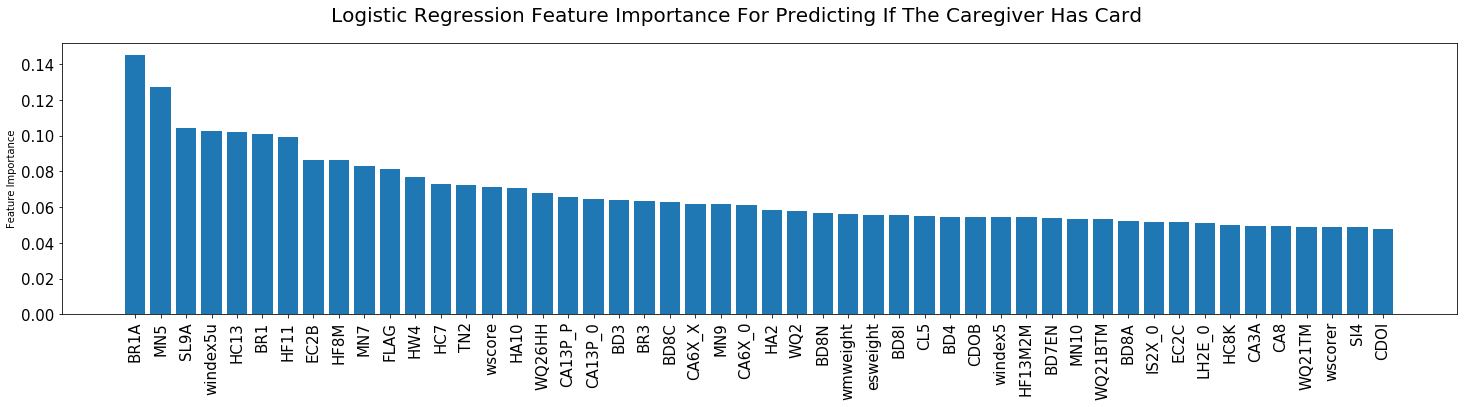

In [41]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Logistic Regression Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

In [42]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [43]:
#Overall classification report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.77      0.85      6448
          1       0.51      0.83      0.64      1879

avg / total       0.84      0.79      0.80      8327



# Random Forest Classifier

Random Forests is an ensemble model which uses a large number of strong decision trees through bagging.
Each decision tree is built on a subset of features and a subset of rows from the data.
The model combines all of them in order to smooth out their predictions

In [44]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
rfc = RandomForestClassifier()

# Train the Classifier to take the training features and learn how they relate
# to the training y 
rfc.fit(X_train, y_train,sample_weight = X_train['chweight'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
y_pred = rfc.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.84


In [46]:
#Overall classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.83      0.89      6448
          1       0.60      0.88      0.71      1879

avg / total       0.88      0.84      0.85      8327



Let's validate the results of Random Forests Model with kfold cross validation

In [47]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(rfc, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.830


In [48]:
feature_imp_data = list(zip(X_train, rfc.feature_importances_))

In [49]:
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [50]:
# Create a df with just the top 50 features
features_df = pd.DataFrame(feature_imp_data[0:50], columns=['name','Score'])
features_df

,name,Score
0,HF9D,0.067486
1,HF8M,0.047508
2,BD8G,0.046148
3,HF7,0.028952
4,BD4,0.024221
5,BD8E,0.024111
6,BD7F,0.023317
7,EC5,0.022455
8,CDOB,0.011684
9,HC3,0.011681


In [51]:
# Merge the feature file with the label file so that it can be used with an external dashboard
final_df = pd.merge(features_df,labels_df,on='name',how='left')
final_df.to_csv("Features_RF_Nig.csv", encoding='utf-8')
final_df.drop_duplicates(inplace= True)
final_df = final_df.reset_index(drop = True)
final_df

,name,Score,label
0,HF9D,0.067486,Day of birth
1,HF8M,0.047508,Month of interview
2,BD8G,0.046148,"Child ate ripe mangoes, papayas"
3,HF7,0.028952,Interviewer number
4,BD4,0.024221,Child drank anything else from the bottle with...
5,BD8E,0.024111,"Child ate white potatoes, white yams, manioc etc."
6,BD7F,0.023317,Child drank any other liquid yesterday
7,EC5,0.022455,Attends early childhood education programme
8,CDOB,0.011684,Date of birth of child (CMC)
9,HC3,0.011681,Main material of floor


In [52]:
people = people[0:50]
score = score[0:50]
x_pos = np.arange(len(people)) 

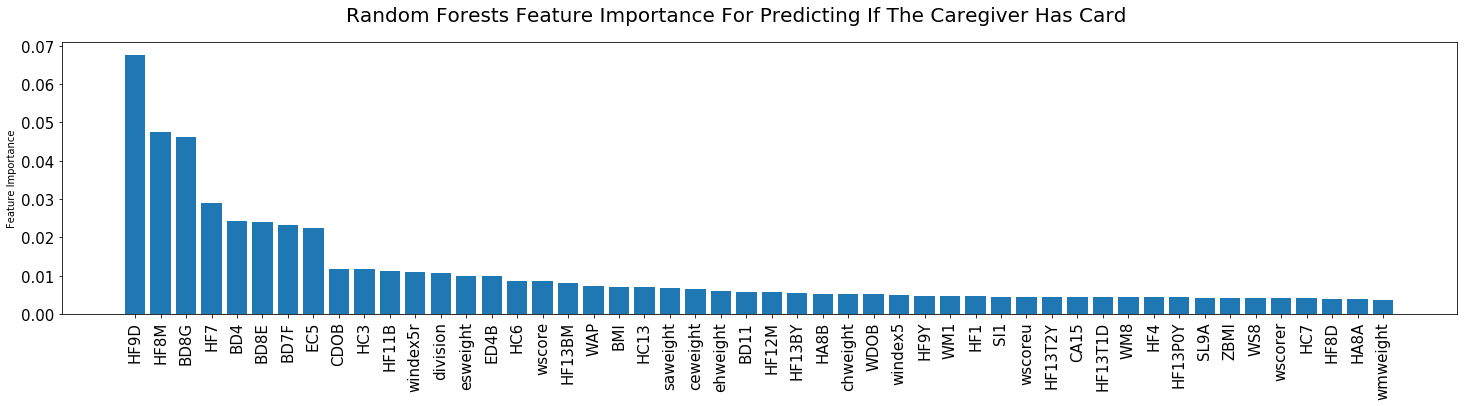

In [53]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Random Forests Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

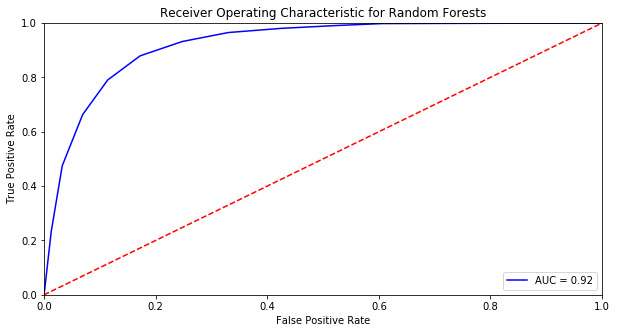

In [54]:
# calculate the fpr and tpr for all thresholds of the classification
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic for Random Forests')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Gradient Boosting Decision Tree Classifier

Gradient Boosting Decision Trees is an ensemble model which uses a sequence of weak constrained decision trees through boosting.
Each tree is allowed a maximum depth and hence tuned and each tree tries to correct the predictions of the trees before it.

In [55]:
gbd = GradientBoostingClassifier()
gbd = gbd.fit(X_train, y_train,sample_weight = X_train['chweight'])

In [56]:
y_pred = gbd.predict(X_test)
print('Accuracy of gradient boosting decision tree classifier on test set: {:.2f}'.format(gbd.score(X_test, y_test)))

Accuracy of gradient boosting decision tree classifier on test set: 0.80


In [57]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(gbd, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.804


In [58]:
feature_imp_data = list(zip(X_train, gbd.feature_importances_))

In [59]:
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [60]:
# Create a df with just the top 50 features
features_df = pd.DataFrame(feature_imp_data[0:100], columns=['name','Score'])
features_df

,name,Score
0,CDOB,0.089105
1,HF1,0.052387
2,HF9D,0.042396
3,wscore,0.025483
4,EC2C,0.021283
5,WQ3,0.021001
6,HF7,0.019467
7,SS4,0.019323
8,HF13P0Y,0.018995
9,HF11B,0.016291


In [61]:
# Merge the feature file with the label file so that it can be used with an external dashboard
final_df = pd.merge(features_df,labels_df,on='name',how='left')
final_df.to_csv("Features_GB_Nig.csv", encoding='utf-8')
final_df.drop_duplicates(inplace= True)
final_df = final_df.reset_index(drop = True)
final_df

,name,Score,label
0,CDOB,0.089105,Date of birth of child (CMC)
1,HF1,0.052387,Cluster number
2,HF9D,0.042396,Day of birth
3,wscore,0.025483,Combined wealth score
4,EC2C,0.021283,Household objects or outside objects
5,WQ3,0.021001,Measurer's number
6,HF7,0.019467,Interviewer number
7,SS4,0.019323,Salt results
8,HF13P0Y,0.018995,Year of Polio at birth immunization
9,HF11B,0.016291,Main data entry clerk number


In [62]:
people = people[0:30]
score = score[0:30]
x_pos = np.arange(len(people)) 

In [63]:
#Overall classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.78      0.86      6448
          1       0.54      0.87      0.67      1879

avg / total       0.86      0.80      0.82      8327



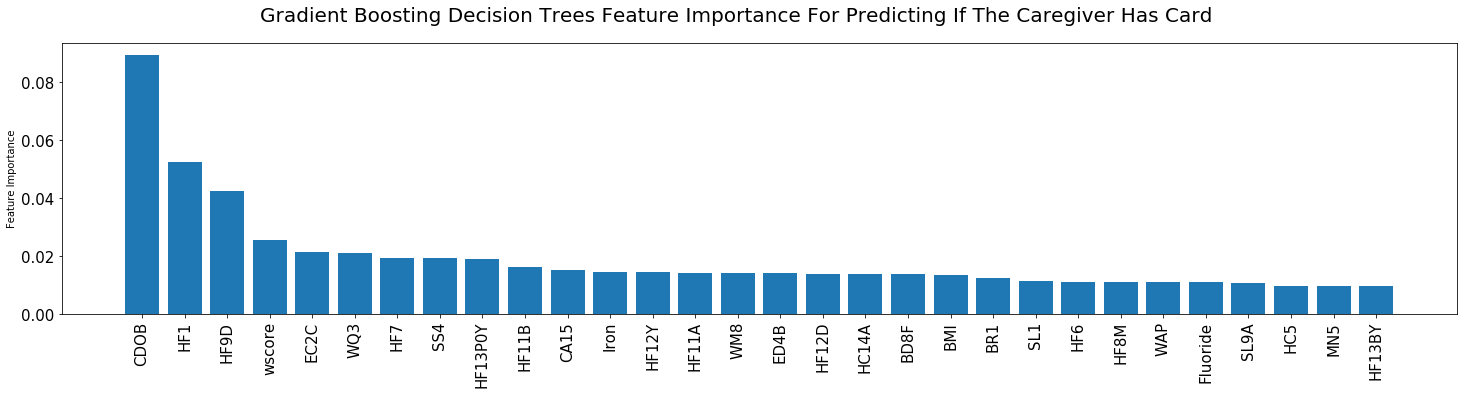

In [64]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Gradient Boosting Decision Trees Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

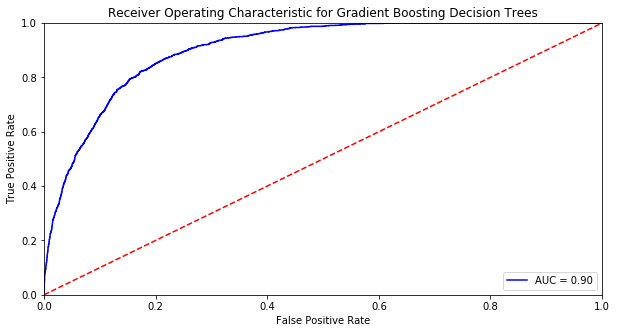

In [65]:
# calculate the fpr and tpr for all thresholds of the classification
probs = gbd.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic for Gradient Boosting Decision Trees')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
print(final_df.head())
nan_df = final_df[final_df.label.isnull()]
len(nan_df)

     name     Score                                 label
0    CDOB  0.089105          Date of birth of child (CMC)
1     HF1  0.052387                        Cluster number
2    HF9D  0.042396                          Day of birth
3  wscore  0.025483                 Combined wealth score
4    EC2C  0.021283  Household objects or outside objects


18

In [67]:
f_name_lst = list(nan_df.name)

In [68]:
final_df = final_df[~final_df['name'].isin(f_name_lst)]

In [69]:
final_df.sort_values('Score')

,name,Score,label
99,WQ11ATH,0.002366,Time of biological test : Hours
97,HF13C2D,0.002461,Day of Pneumococal 2
96,HF13P3D,0.002521,Day of Polio3 immunization
95,HF13T3D,0.002564,Day of Pentavalent 3rd Dose
93,CL9,0.002622,Hours spent fetching water or collecting firewood
92,WS10,0.002625,Toilet shared with other household or with gen...
91,BD8J,0.002628,"Child ate meat, such as beef, lamb, goat, chicken"
89,BD8AN,0.002846,Times drank or ate yogurt
87,HF13BM,0.002979,Month of BCG immunization
86,TN12_1,0.003074,Person 1 who slept under net


In [70]:
selected_features = list(final_df.name)
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [71]:
#Training the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [73]:
feature_importance = (logreg.coef_[0])
feature_importance = (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

In [74]:
col_list = list(X_train.columns[sorted_idx])
label_list = []
for i in col_list:
    label_row = final_df[final_df['name'] == i]
    label_list.append(list(label_row.label))

label_list = [''.join(x) for x in label_list]
print(label_list)

['Child drank milk yesterday', 'Soap/other material available for washing hands', 'Total children aged 1-17 years', 'Times child ate solid or semi-solid food', 'Iron', 'Fluoride', 'Month of BCG immunization', 'Birth certificate', 'Sheep', 'Urban wealth score', 'Rank number of the selected child', 'Salt results', 'Day of Pentavalent 3rd Dose', 'Times drank or ate yogurt', 'Goats', 'Ecoli source sample weight', 'Month of Measles 2', 'Times child drank milk', 'Number of hours', 'What was done to dispose of the stools', 'Day of birth', "Measurer's number", 'Hours spent fetching water or collecting firewood', 'Date of birth of child (CMC)', 'Cattle, milk cows, buffaloes or bulls', 'Number of blue colonies in 1mL HH water sample', 'Type of toilet facility', 'Body Mass Index WHO', 'Day of birth as written on vaccination record', 'Day of BCG immunization', 'Acres of agricultural land members of household owns', 'Year of birth as written on vaccination record', 'Year of Polio at birth immunizat

In [75]:
result_df = pd.DataFrame({'Feature': label_list ,'Coefficient': feature_importance[sorted_idx],'Column' :col_list})
result_df.head()

,Coefficient,Column,Feature
0,-0.530654,BD7D,Child drank milk yesterday
1,-0.386748,HW4,Soap/other material available for washing hands
2,-0.274904,SL1,Total children aged 1-17 years
3,-0.223536,BD11,Times child ate solid or semi-solid food
4,-0.208720,Iron,Iron


In [76]:
result_df.to_csv('result_Pakistan.csv')

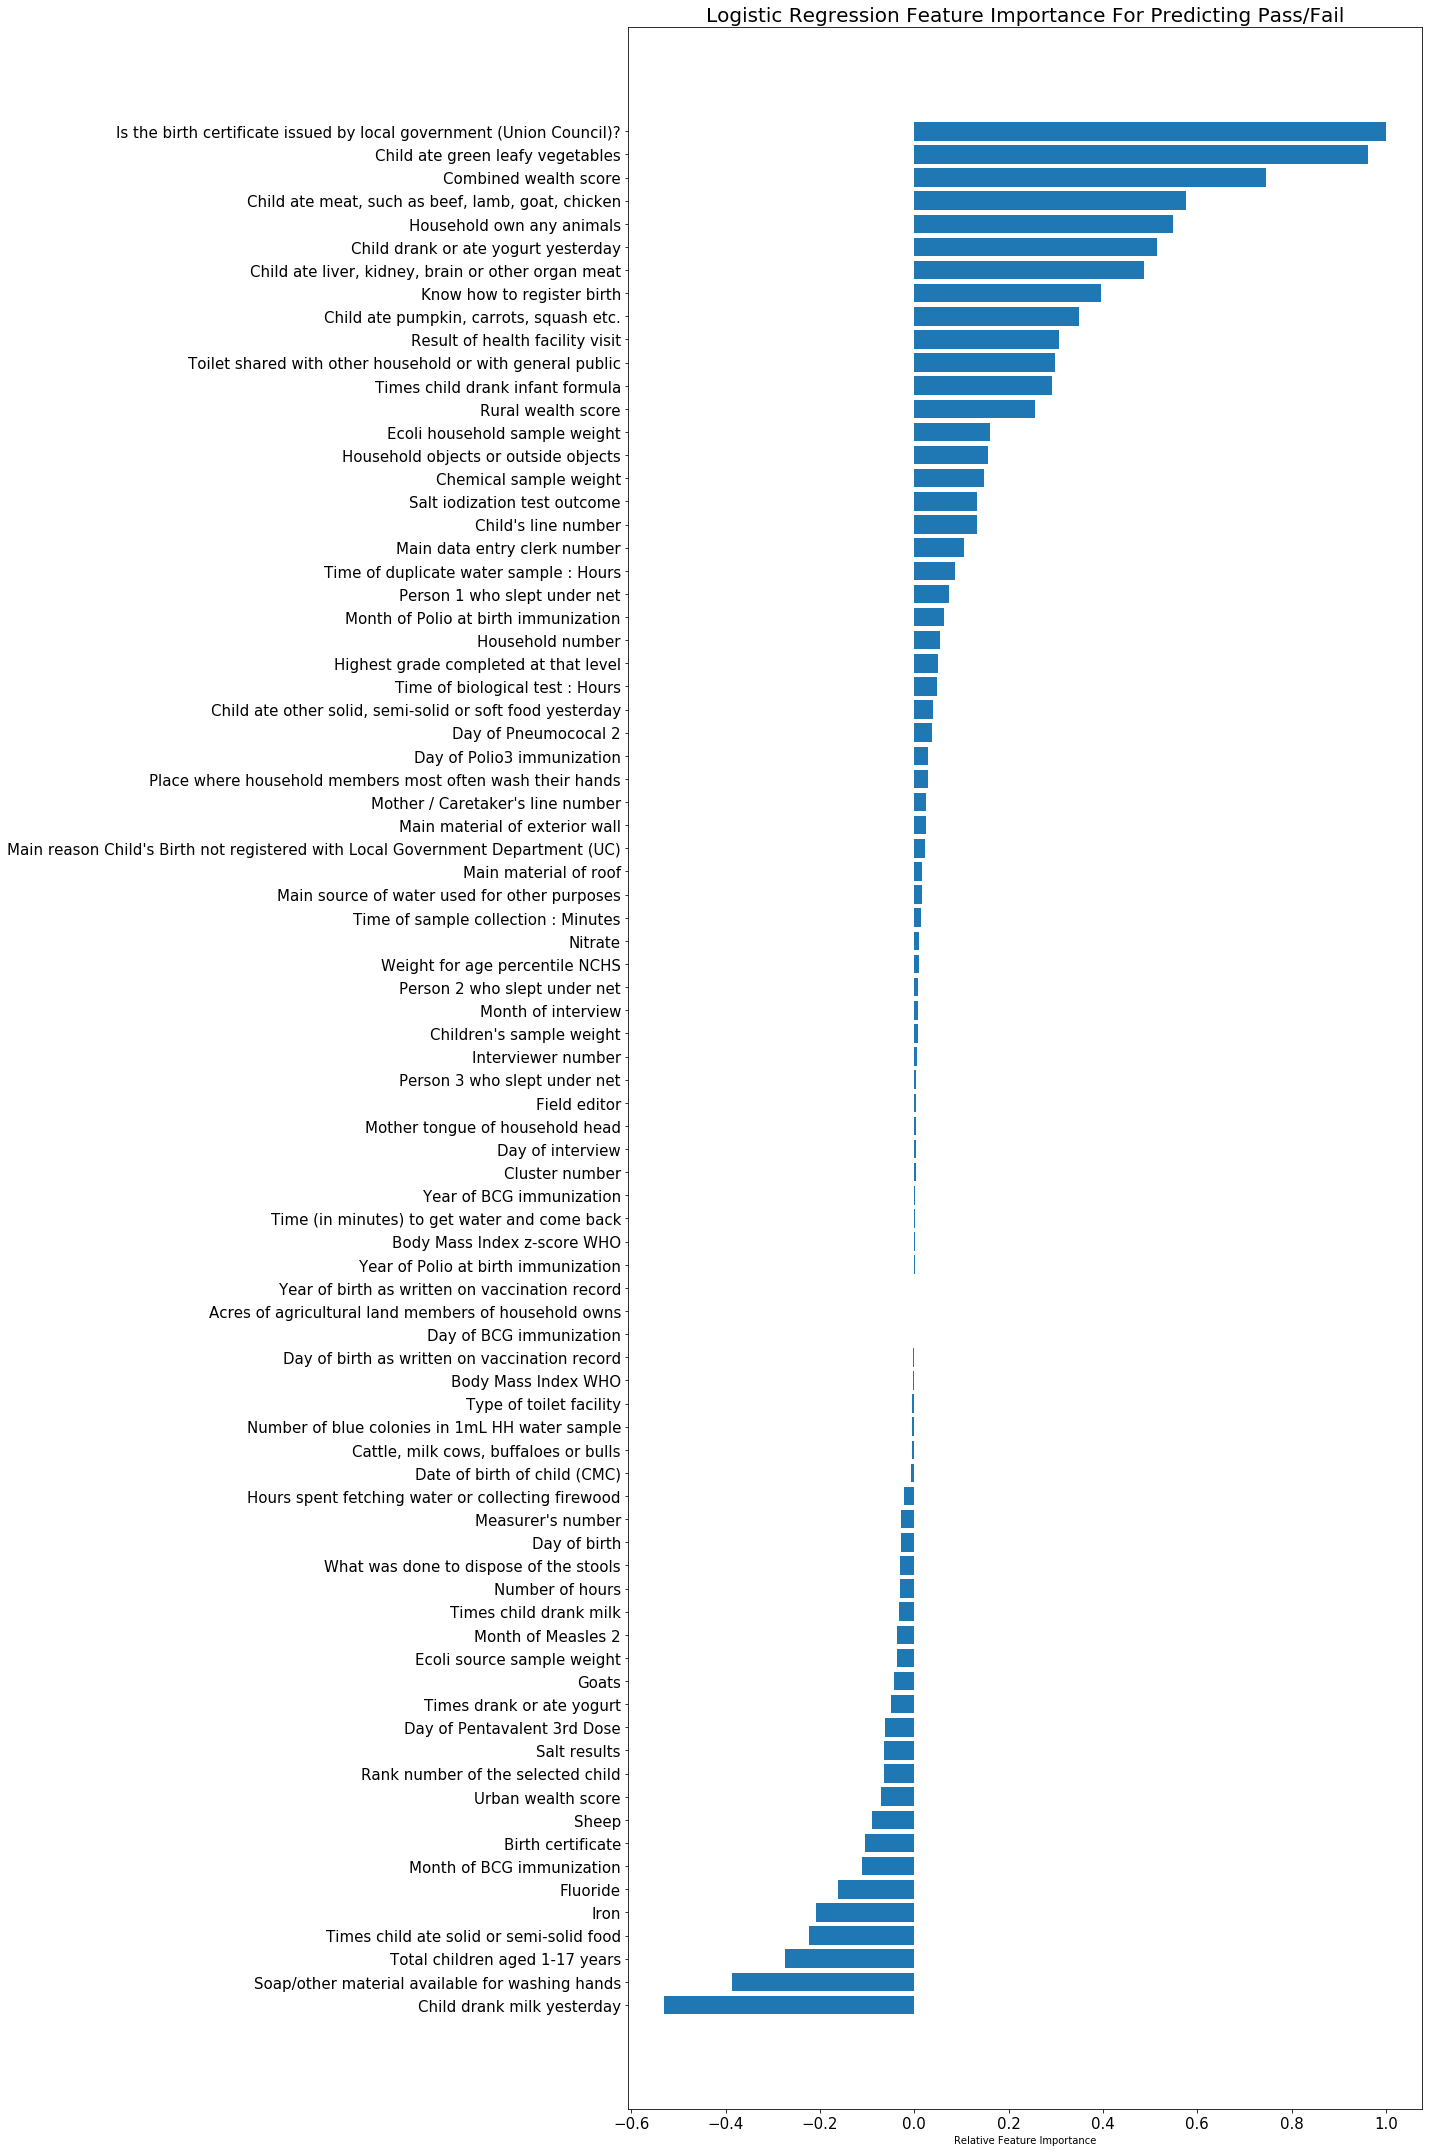

In [77]:
featfig = plt.figure(figsize=(20,30))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(label_list, fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.title('Logistic Regression Feature Importance For Predicting Pass/Fail', fontsize=20)
plt.tight_layout()   
plt.show()